In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import pandas as pd

In [8]:
df1 = pd.read_excel('D:/Ment Class/Practise11/Excel Data/df1.xlsx', parse_dates=True, index_col=0)


In [9]:
df1.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


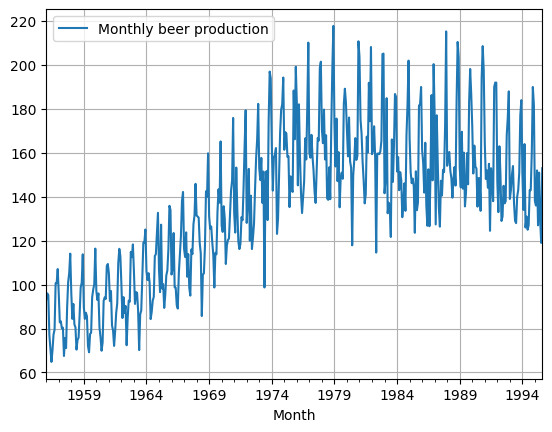

In [10]:
df1.plot();
plt.grid()

In [11]:
df2=pd.read_excel('D:/Ment Class/Practise11/Excel Data/df2.xlsx')

In [12]:
df2.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


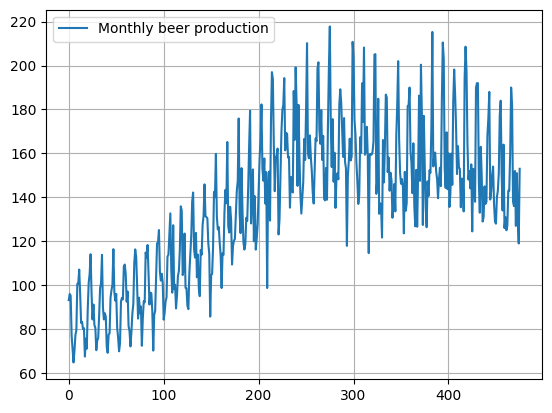

In [13]:
df2.plot();
plt.grid()

In [14]:
date = pd.date_range(start='1/1/1956', end='9/1/1995', freq='M')

In [15]:
date

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=476, freq='M')

In [16]:
df2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df2.head()

,Month,Monthly beer production,Time_Stamp
0,1956-01,93.2,1956-01-31
1,1956-02,96.0,1956-02-29
2,1956-03,95.2,1956-03-31
3,1956-04,77.1,1956-04-30
4,1956-05,70.9,1956-05-31


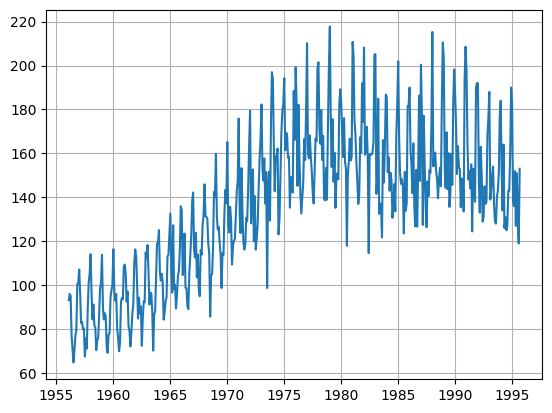

In [17]:
plt.plot(df2['Time_Stamp'],df2['Monthly beer production']);
plt.grid()

In [18]:
df1.describe().round(2)

,Monthly beer production
count,476.00
mean,136.40
std,33.74
min,64.80
25%,112.90
50%,139.15
75%,158.82
max,217.80


In [19]:
df2.describe()

,Monthly beer production,Time_Stamp
count,476.000000,476
mean,136.395378,1975-11-15 00:30:15.126050432
min,64.800000,1956-01-31 00:00:00
25%,112.900000,1965-12-23 06:00:00
50%,139.150000,1975-11-15 00:00:00
75%,158.825000,1985-10-07 18:00:00
max,217.800000,1995-08-31 00:00:00
std,33.738725,NaN


In [23]:
observations_1956 = df1.loc['1956']


In [24]:
df1.loc['1956']


,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
1956-06-01,64.8
1956-07-01,70.1
1956-08-01,77.3
1956-09-01,79.5


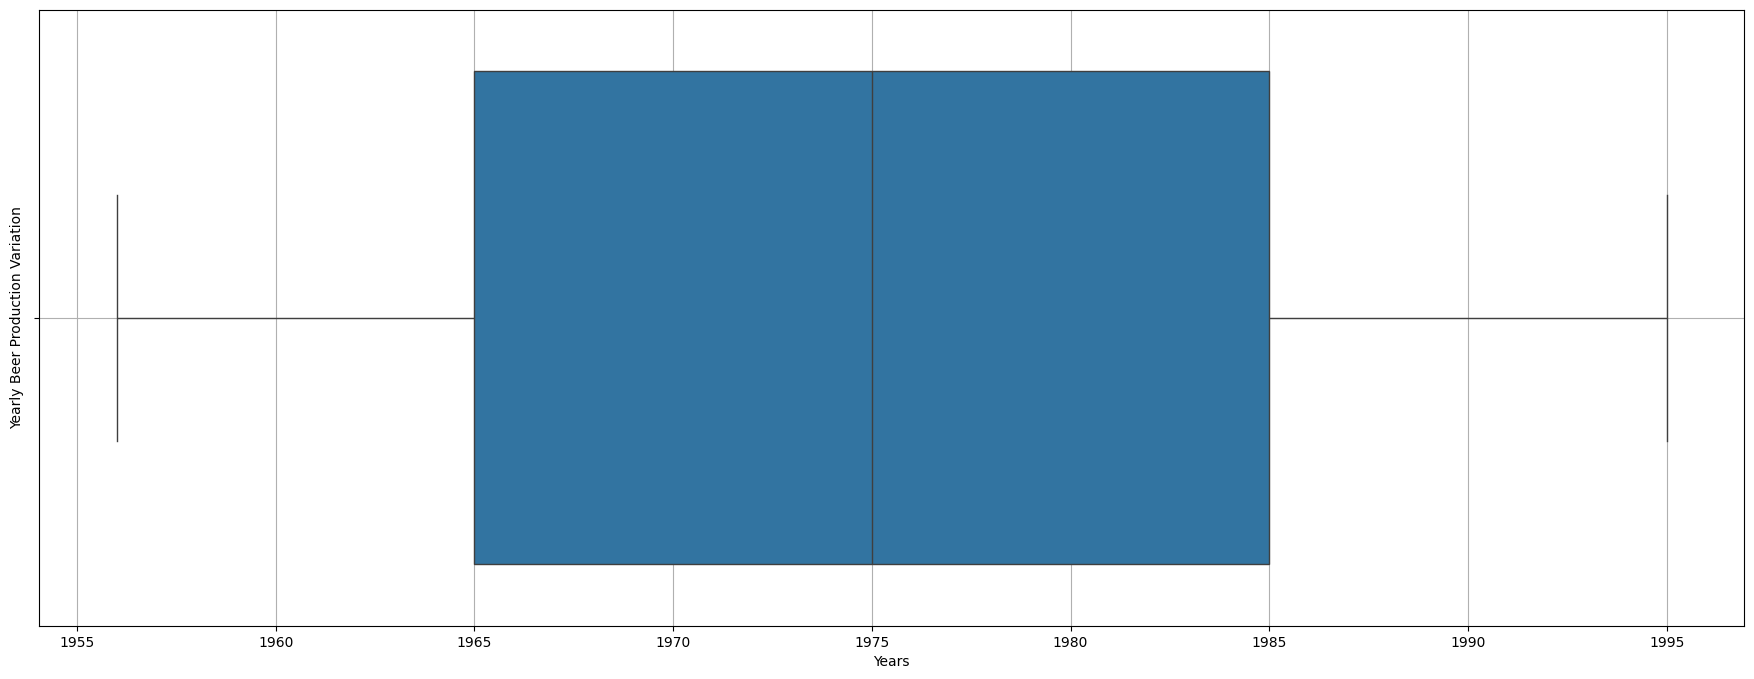

In [25]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df1.index.year, data=df1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Beer Production Variation');

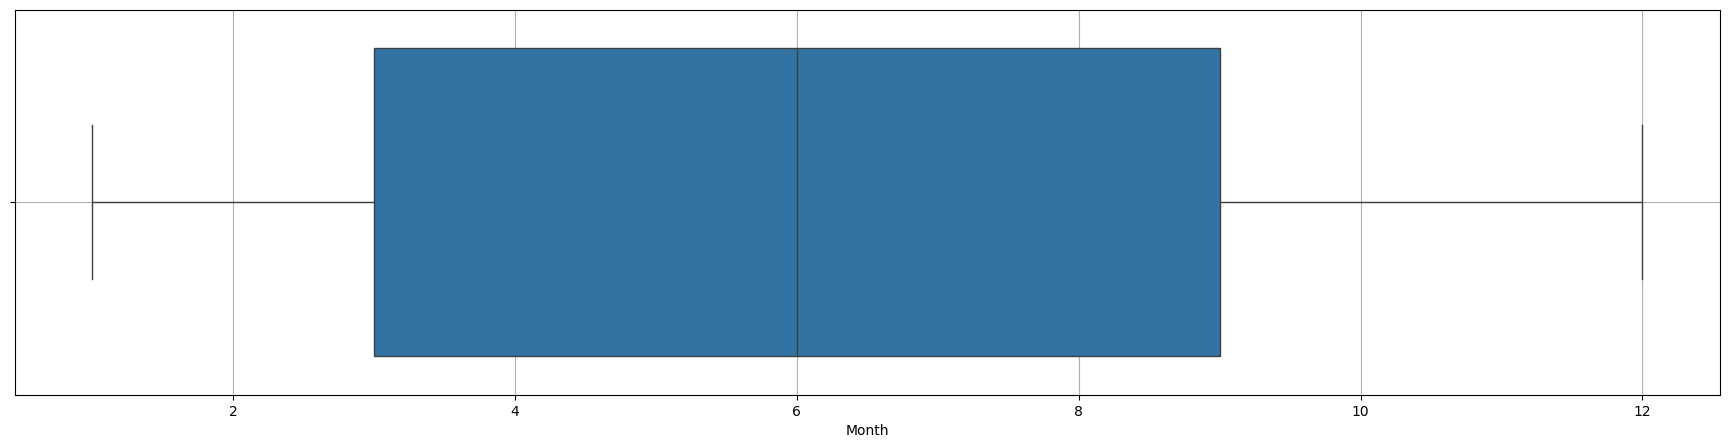

In [26]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(x=df1.index.month, data=df1, ax=ax,whis=1.5)
plt.grid();

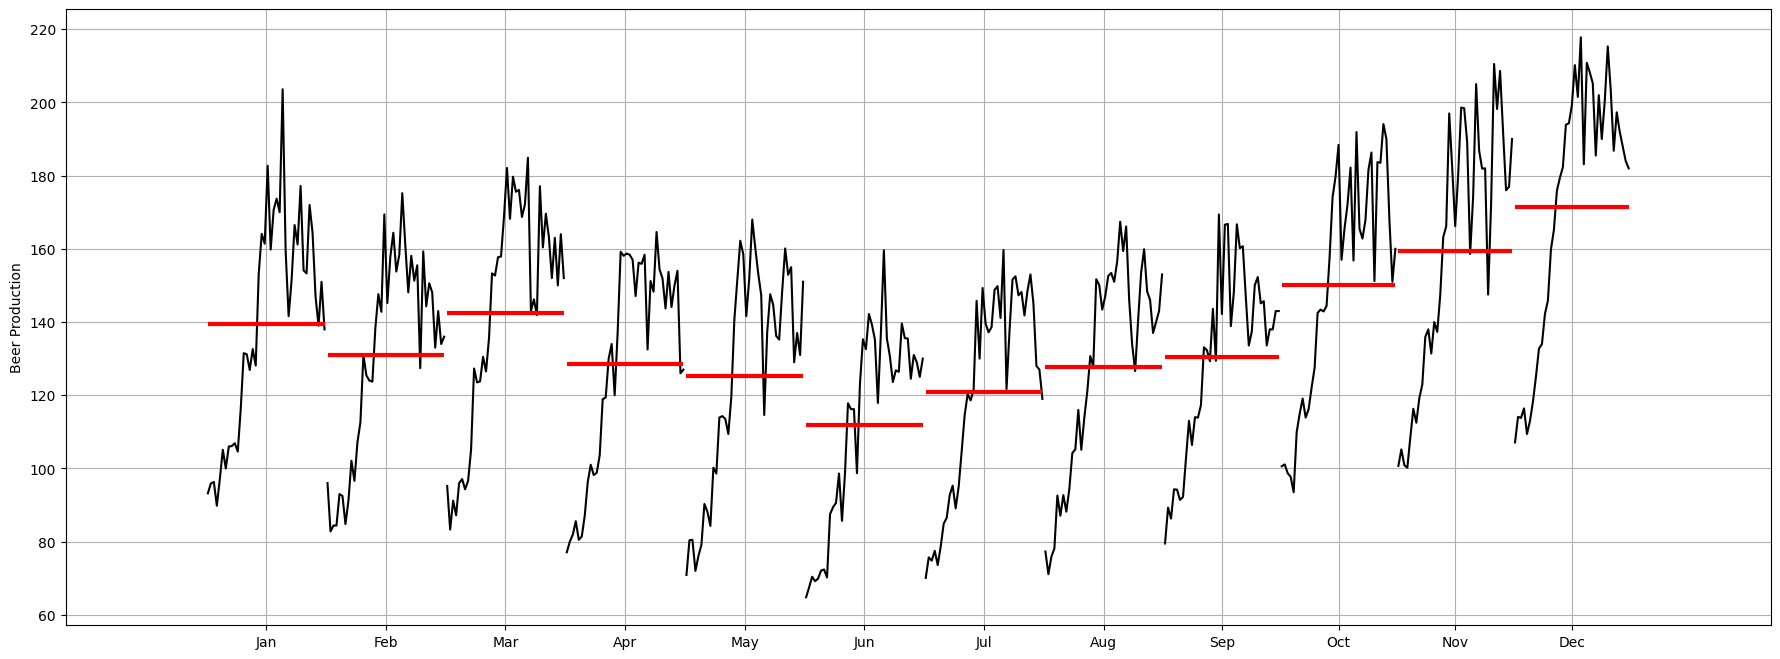

In [27]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df1,ylabel='Beer Production',ax=ax)
plt.grid();

In [28]:
df2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df2.head()

,Month,Monthly beer production
Time_Stamp,,
1956-01-31,1956-01,93.2
1956-02-29,1956-02,96.0
1956-03-31,1956-03,95.2
1956-04-30,1956-04,77.1
1956-05-31,1956-05,70.9


In [29]:
df2.drop(labels='Month',inplace=True,axis=1)
df2.head()

,Monthly beer production
Time_Stamp,
1956-01-31,93.2
1956-02-29,96.0
1956-03-31,95.2
1956-04-30,77.1
1956-05-31,70.9


In [30]:
df2['Monthly beer production']

Time_Stamp
1956-01-31     93.2
1956-02-29     96.0
1956-03-31     95.2
1956-04-30     77.1
1956-05-31     70.9
              ...  
1995-04-30    127.0
1995-05-31    151.0
1995-06-30    130.0
1995-07-31    119.0
1995-08-31    153.0
Name: Monthly beer production, Length: 476, dtype: float64

In [31]:
yearly_sales_across_months = pd.pivot_table(df2, values = 'Monthly beer production', columns = df2.index.month, 
                                        index = df2.index.year)

yearly_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1956,93.2,96.0,95.2,77.1,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1
1957,95.9,82.8,83.3,80.0,80.4,67.5,75.7,71.1,89.3,101.1,105.2,114.1
1958,96.3,84.4,91.2,81.9,80.5,70.4,74.8,75.9,86.3,98.7,100.9,113.8
1959,89.8,84.4,87.2,85.6,72.0,69.2,77.5,78.1,94.3,97.7,100.2,116.4
1960,97.1,93.0,96.0,80.5,76.1,69.9,73.6,92.6,94.2,93.5,108.5,109.4
1961,105.1,92.5,97.1,81.4,79.1,72.1,78.7,87.1,91.4,109.9,116.3,113.0
1962,100.0,84.8,94.3,87.1,90.3,72.4,84.9,92.7,92.2,114.9,112.5,118.3
1963,106.0,91.2,96.6,96.3,88.2,70.2,86.5,88.2,102.8,119.1,119.2,125.1
1964,106.1,102.1,105.2,101.0,84.3,87.5,92.7,94.4,113.0,113.9,122.9,132.7


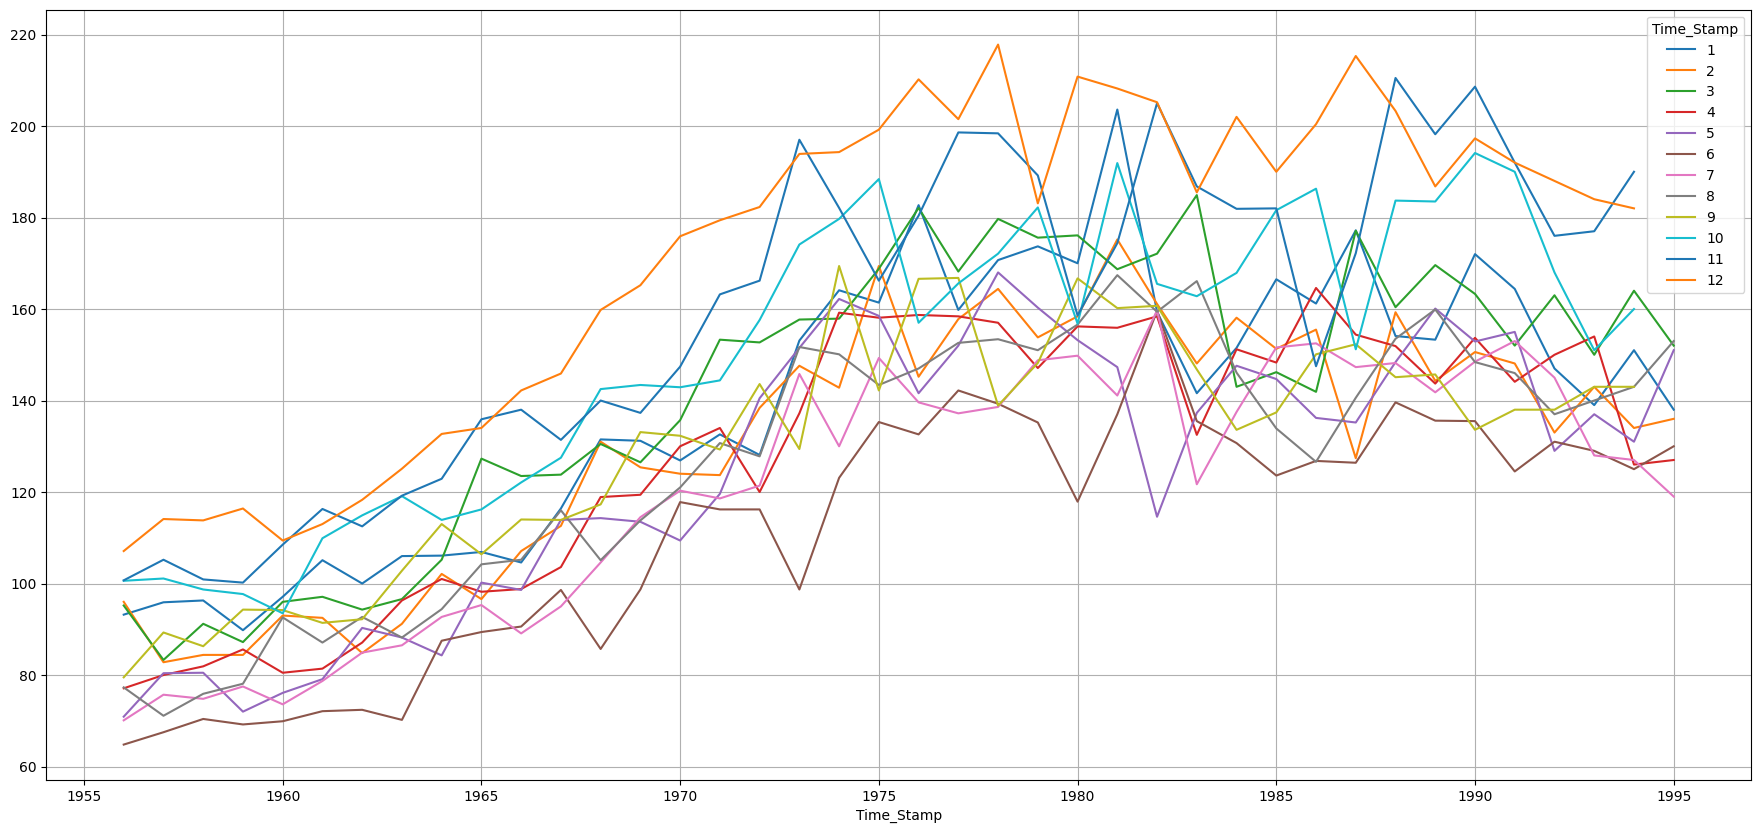

In [32]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

In [33]:
df_yearly_sum = df1.resample('A').sum()
df_yearly_sum.head()

,Monthly beer production
Month,
1956-12-31,1032.5
1957-12-31,1046.4
1958-12-31,1055.1
1959-12-31,1052.4
1960-12-31,1084.4


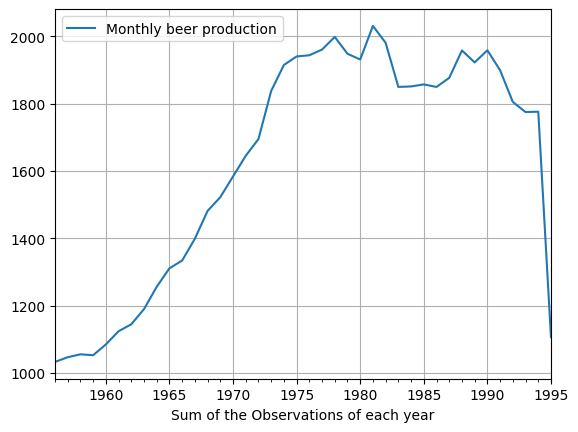

In [34]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [35]:
df_yearly_mean = df1.resample('Y').mean().round(2)
df_yearly_mean.head()

,Monthly beer production
Month,
1956-12-31,86.04
1957-12-31,87.20
1958-12-31,87.92
1959-12-31,87.70
1960-12-31,90.37


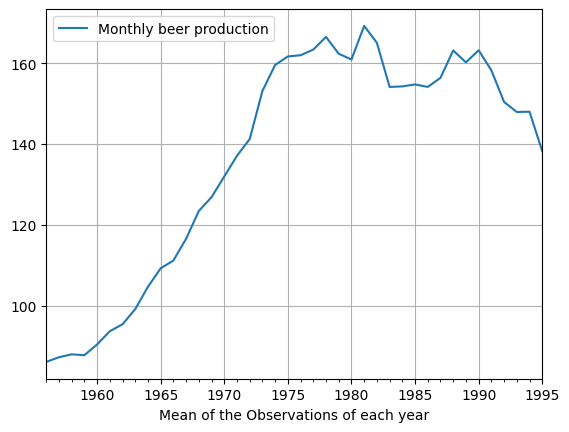

In [36]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

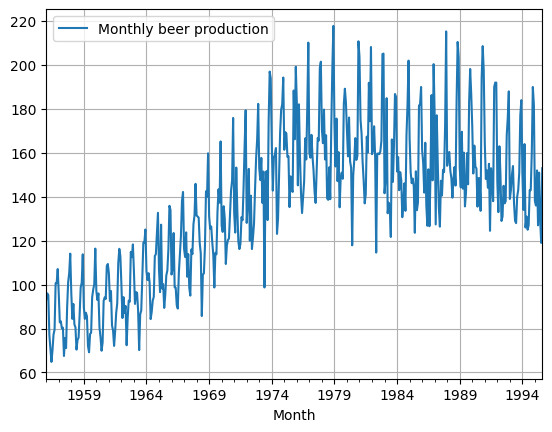

In [37]:
df1.plot()
plt.grid();

In [38]:
df_quarterly_sum = df1.resample('Q').sum()
df_quarterly_sum.head()

,Monthly beer production
Month,
1956-03-31,284.4
1956-06-30,212.8
1956-09-30,226.9
1956-12-31,308.4
1957-03-31,262.0


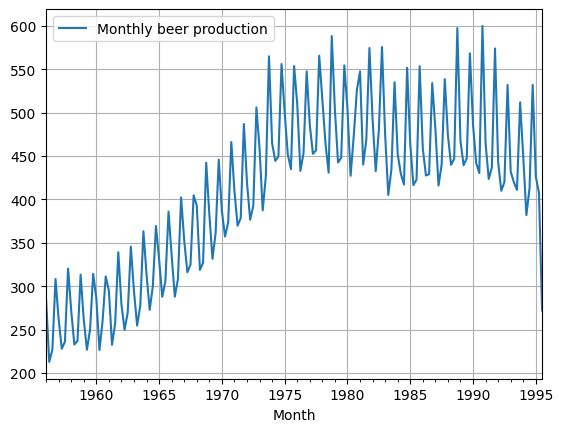

In [39]:
df_quarterly_sum.plot();
plt.grid()

In [40]:
df_quarterly_mean = df1.resample('Q').mean()
df_quarterly_mean.head()

,Monthly beer production
Month,
1956-03-31,94.800000
1956-06-30,70.933333
1956-09-30,75.633333
1956-12-31,102.800000
1957-03-31,87.333333


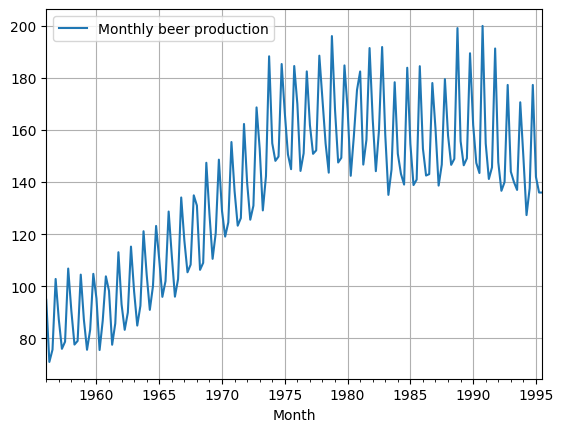

In [41]:
df_quarterly_mean.plot();
plt.grid()

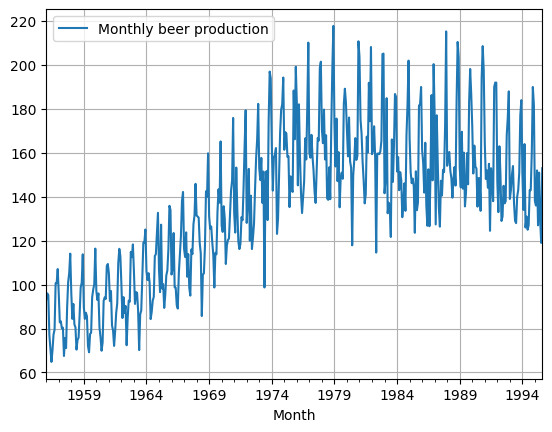

In [42]:
df1.plot()
plt.grid();

In [43]:
df_daily_sum = df1.resample('D').sum()
df_daily_sum

,Monthly beer production
Month,
1956-01-01,93.2
1956-01-02,0.0
1956-01-03,0.0
1956-01-04,0.0
1956-01-05,0.0
...,...
1995-07-28,0.0
1995-07-29,0.0
1995-07-30,0.0


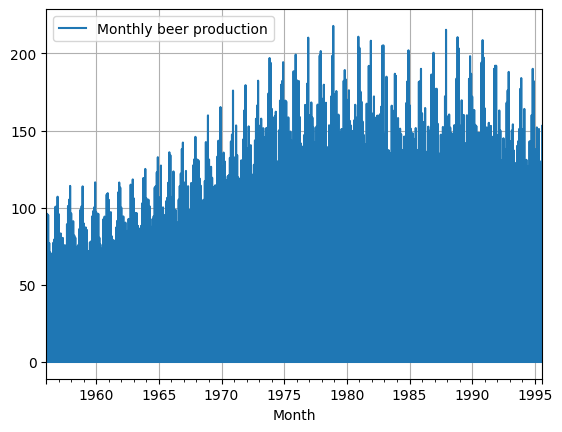

In [44]:
df_daily_sum.plot()
plt.grid();

In [45]:
df_decade_sum = df1.resample('10Y').sum()
df_decade_sum

,Monthly beer production
Month,
1956-12-31,1032.5
1966-12-31,11596.0
1976-12-31,16961.7
1986-12-31,19257.3
1996-12-31,16076.7


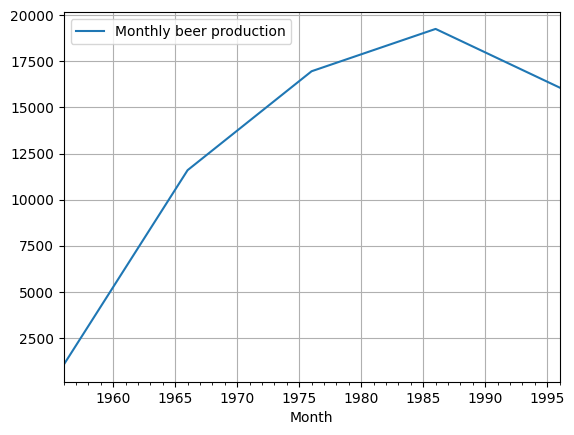

In [46]:
df_decade_sum.plot();
plt.grid()

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

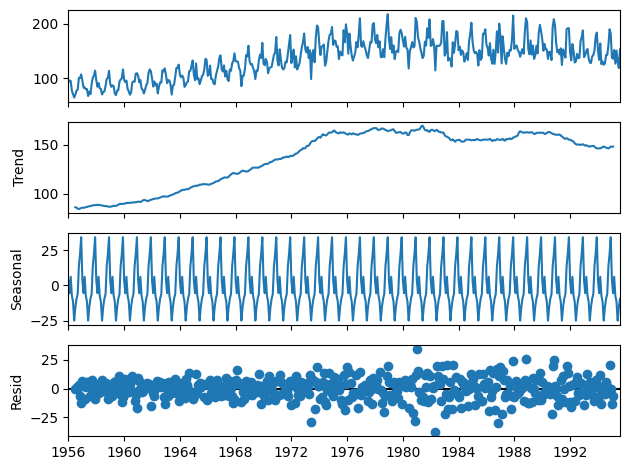

In [48]:
decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

In [49]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [50]:
print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 Month
1956-01-01      NaN
1956-02-01      NaN
1956-03-01      NaN
1956-04-01      NaN
1956-05-01      NaN
1956-06-01      NaN
1956-07-01    86.15
1956-08-01    85.72
1956-09-01    84.67
1956-10-01    84.30
1956-11-01    84.81
1956-12-01    85.32
Name: trend, dtype: float64 

Seasonality 
 Month
1956-01-01     3.64
1956-02-01    -5.50
1956-03-01     6.22
1956-04-01    -7.32
1956-05-01   -11.50
1956-06-01   -25.05
1956-07-01   -15.49
1956-08-01    -9.44
1956-09-01    -6.11
1956-10-01    13.54
1956-11-01    22.60
1956-12-01    34.42
Name: seasonal, dtype: float64 

Residual 
 Month
1956-01-01      NaN
1956-02-01      NaN
1956-03-01      NaN
1956-04-01      NaN
1956-05-01      NaN
1956-06-01      NaN
1956-07-01    -0.56
1956-08-01     1.02
1956-09-01     0.94
1956-10-01     2.77
1956-11-01    -6.71
1956-12-01   -12.64
Name: resid, dtype: float64 



In [51]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.round(2).head(12)

Month
1956-01-01      NaN
1956-02-01      NaN
1956-03-01      NaN
1956-04-01      NaN
1956-05-01      NaN
1956-06-01      NaN
1956-07-01    85.59
1956-08-01    86.74
1956-09-01    85.61
1956-10-01    87.06
1956-11-01    78.10
1956-12-01    72.68
dtype: float64

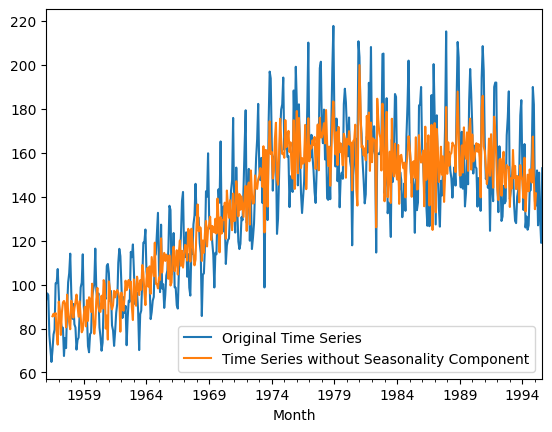

In [54]:
df1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [55]:
observations_1979_tail = df1.loc['1979'].tail()


In [56]:
df1.loc['1979'].tail()

,Monthly beer production
Month,
1979-08-01,151.0
1979-09-01,148.2
1979-10-01,182.2
1979-11-01,189.2
1979-12-01,183.1


In [57]:
df_missing_value = df1.replace(to_replace=183.1,value=np.NaN)

In [64]:
df_missing_value.isna().sum()

Monthly beer production    1
dtype: int64

In [65]:
observations_1979 = df1.loc['1979']


In [66]:
df1.loc['1979']


,Monthly beer production
Month,
1979-01-01,173.7
1979-02-01,153.8
1979-03-01,175.6
1979-04-01,147.1
1979-05-01,160.3
1979-06-01,135.2
1979-07-01,148.8
1979-08-01,151.0
1979-09-01,148.2


In [69]:
# Check if '1979' column exists in df_missing_value
if '1979' in df_missing_value.columns:
    # Perform interpolation, rounding, and tail operations
    result = df_missing_value.interpolate(method='spline', order=1)['1979'].round(2).tail()
    print(result)
else:
    print("Column '1979' does not exist in the DataFrame.")

Column '1979' does not exist in the DataFrame.


In [72]:
# Assuming '1979' is an index value
if '1979' in df_missing_value.index:
    # Access the row(s) corresponding to the index '1979'
    row_1979 = df_missing_value.loc['1979']
    print(row_1979)
else:
    print("Index '1979' does not exist in the DataFrame.")

            Monthly beer production
Month                              
1979-01-01                    173.7
1979-02-01                    153.8
1979-03-01                    175.6
1979-04-01                    147.1
1979-05-01                    160.3
1979-06-01                    135.2
1979-07-01                    148.8
1979-08-01                    151.0
1979-09-01                    148.2
1979-10-01                    182.2
1979-11-01                    189.2
1979-12-01                      NaN
